## Module5-HW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

- Use the `train.csv` data to train and `test.csv` data to report your testing results.

In [2]:
train_df=pd.read_csv('train.csv',index_col=0)
display(train_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
test_df=pd.read_csv('test.csv',index_col=0)
display(test_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


- Your target variable is `SalePrice`

In [4]:
y_train=train_df['SalePrice']
X_train=train_df.drop(['SalePrice'],axis=1)

- Report summary information about your data:

- - Report min, max, mean of your numerical features (use `describe` method)


In [5]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

- - Create scatter (with respect to target variable) and box plots of your variables

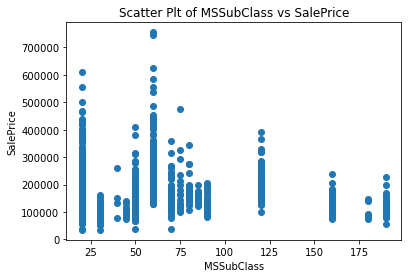

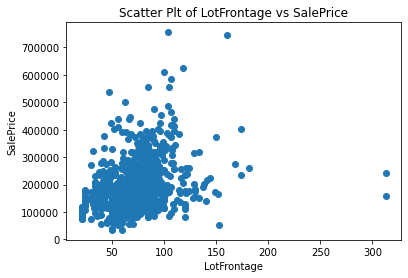

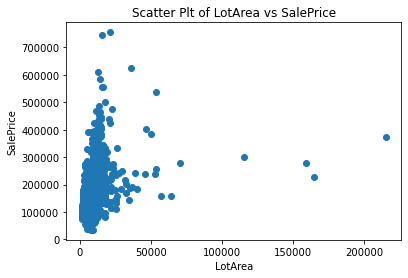

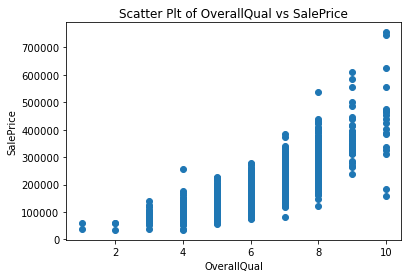

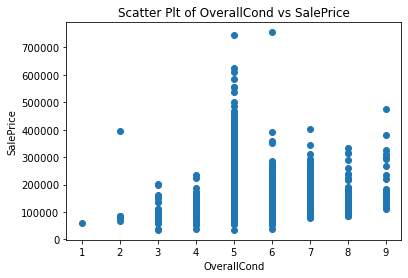

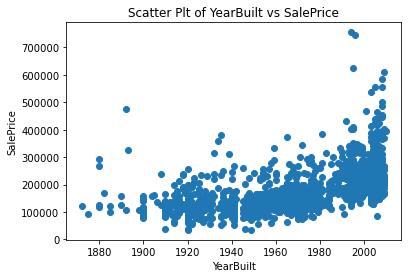

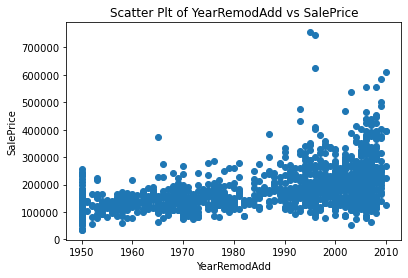

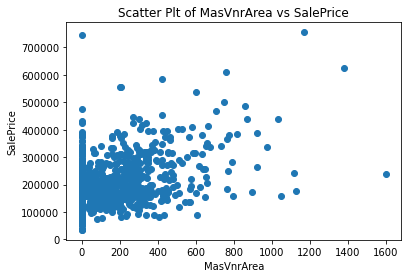

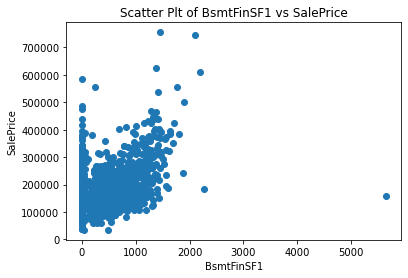

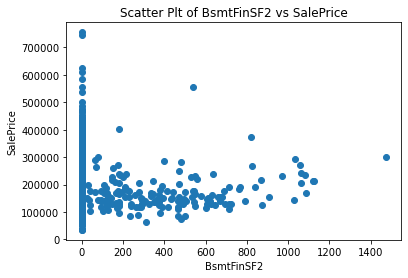

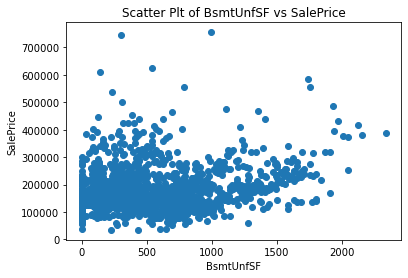

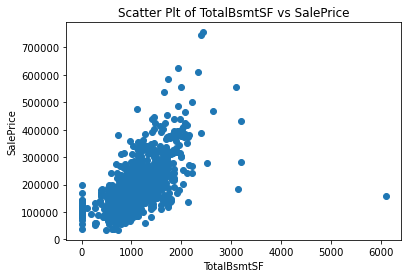

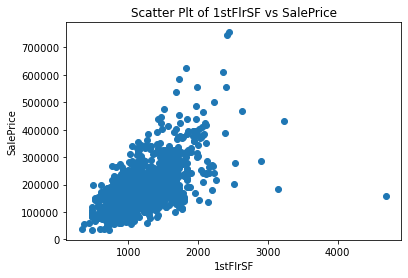

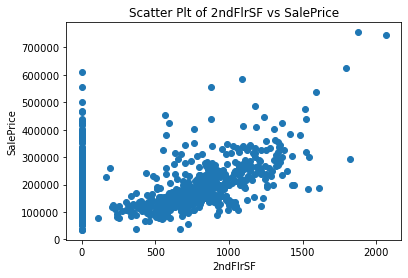

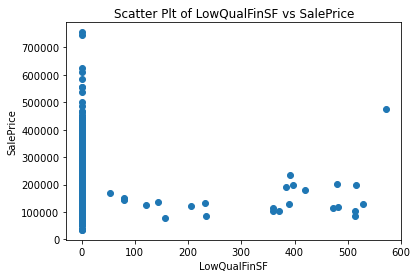

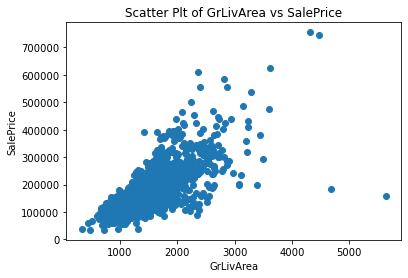

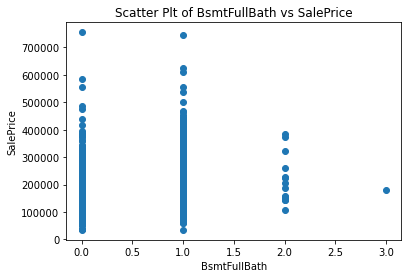

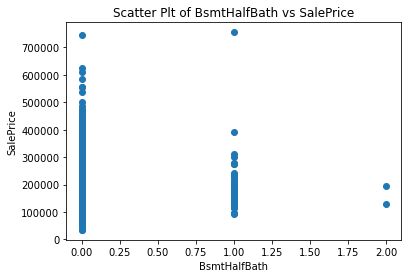

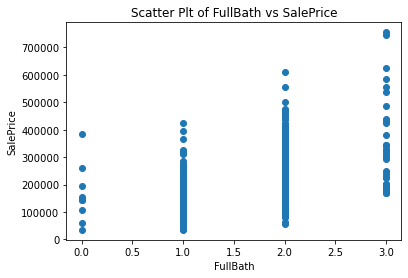

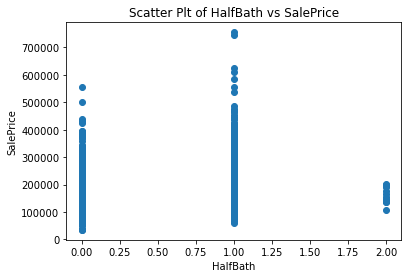

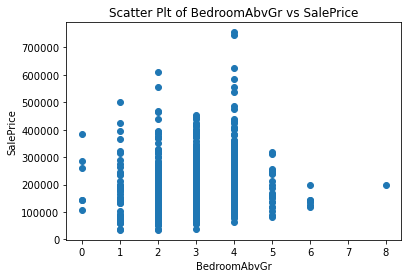

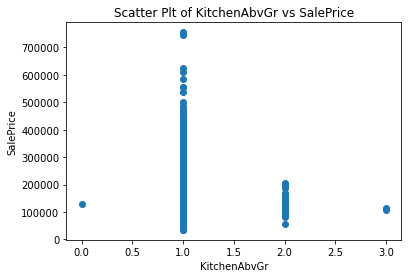

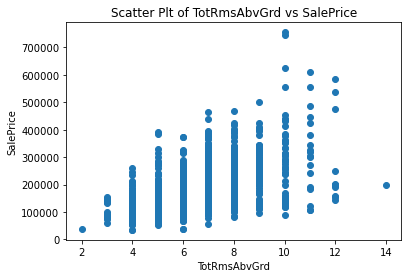

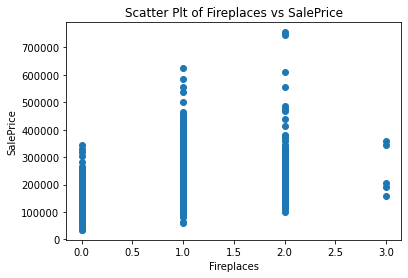

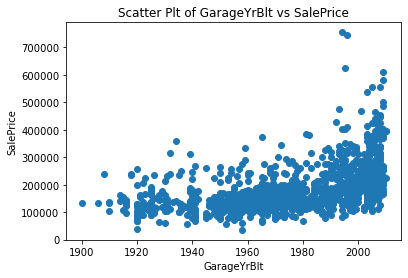

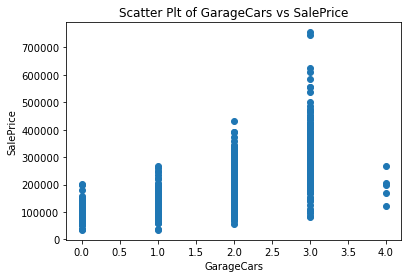

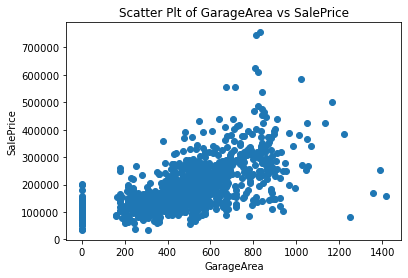

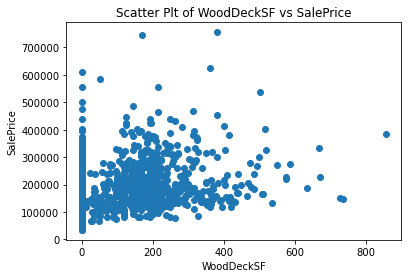

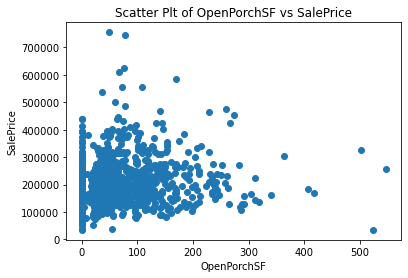

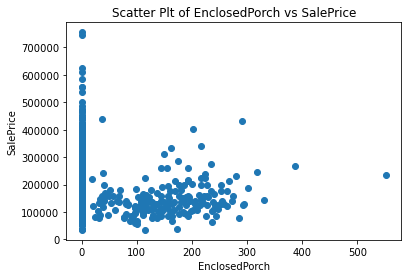

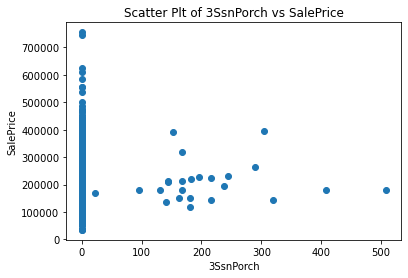

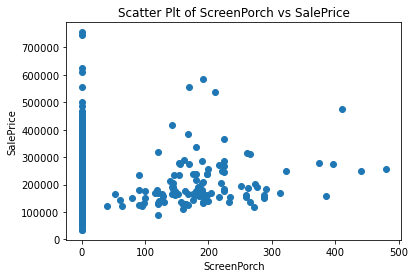

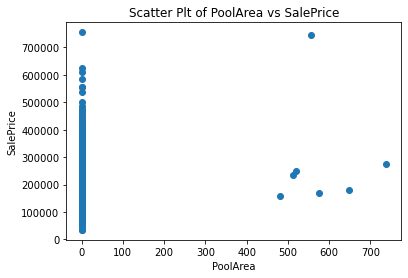

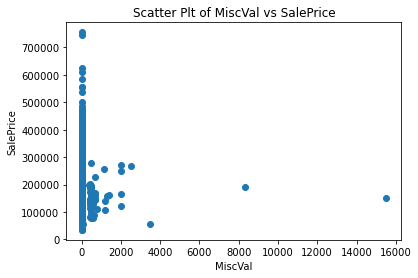

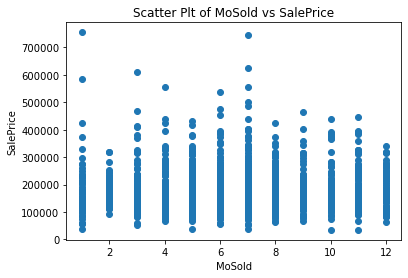

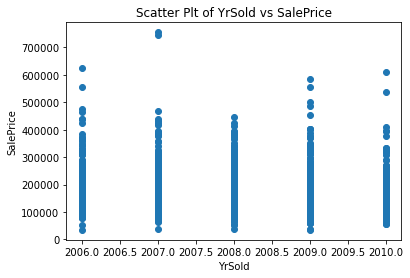

In [7]:
# Scatter plots of numerical features against the target (SalePrice)
numeric_features=X_train.select_dtypes(include=['float64','int64']).columns
for feature in numeric_features:
    plt.scatter(X_train[feature],y_train)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'Scatter Plt of {feature} vs SalePrice')
    plt.show()

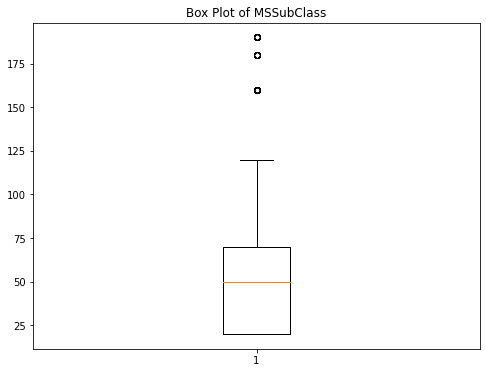

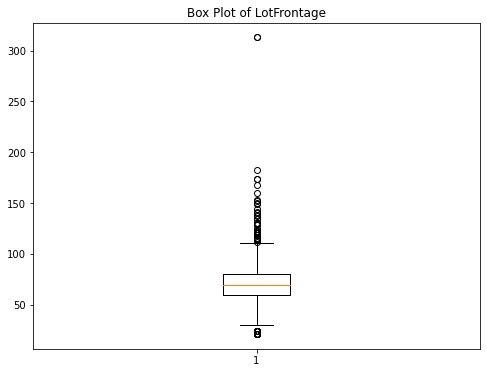

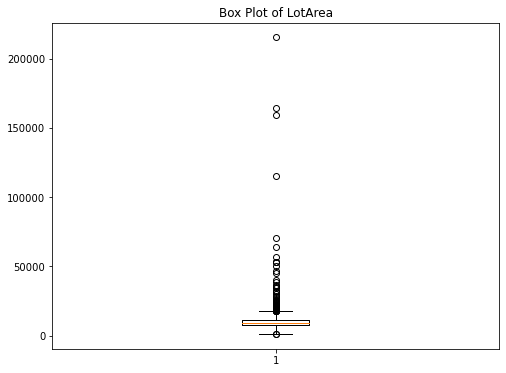

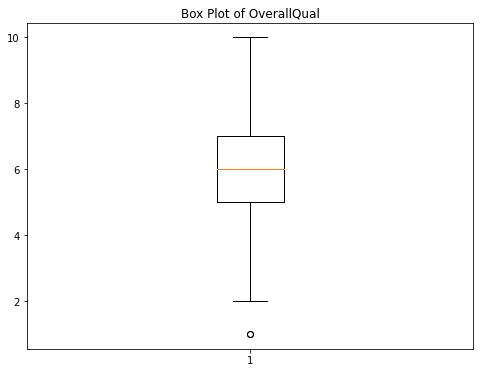

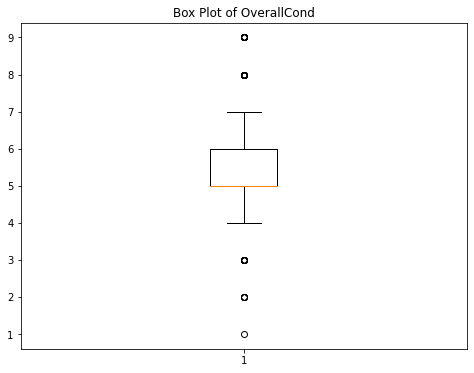

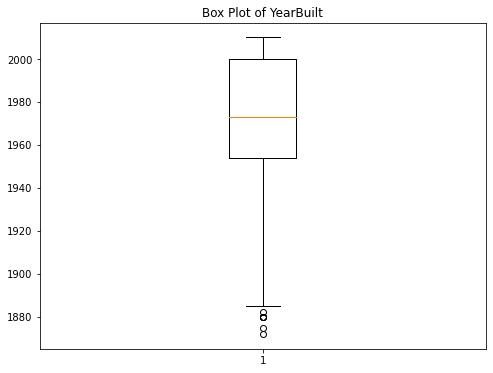

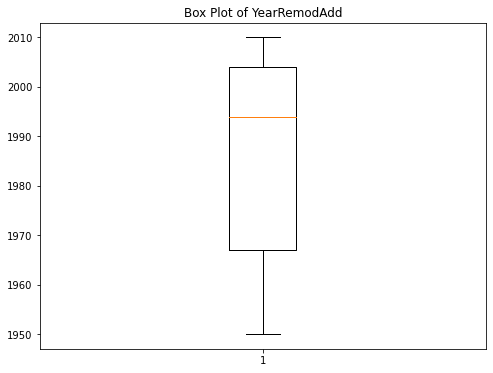

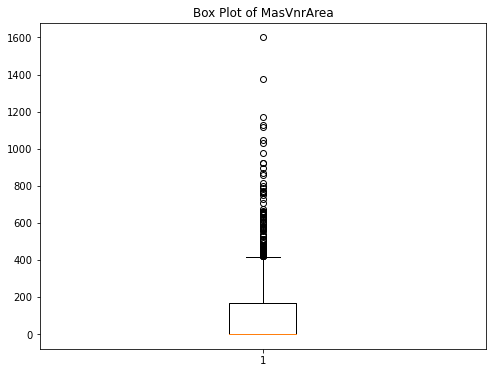

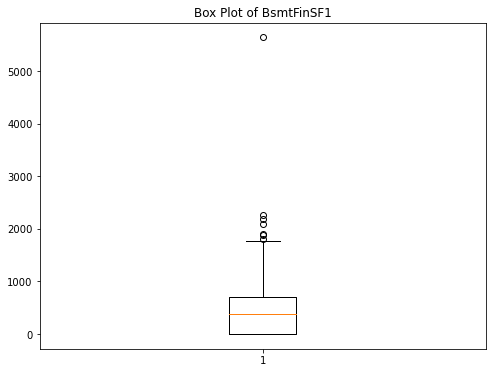

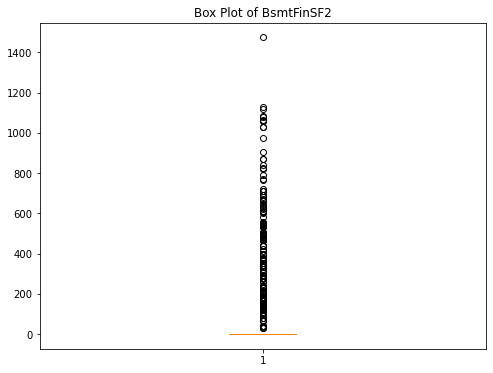

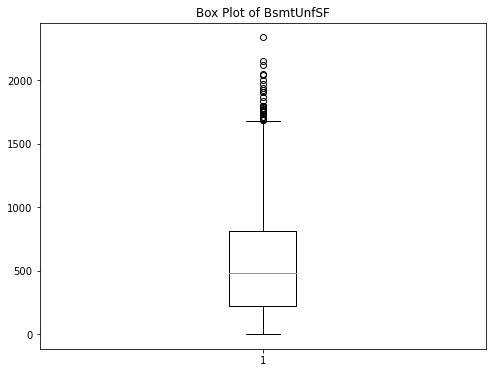

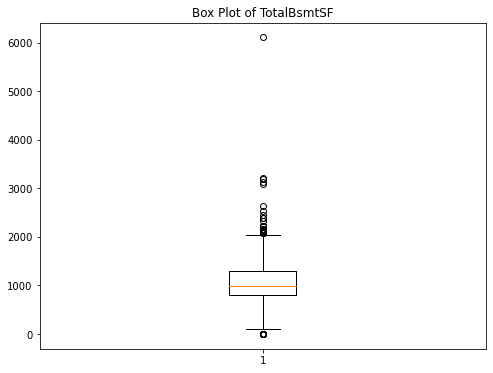

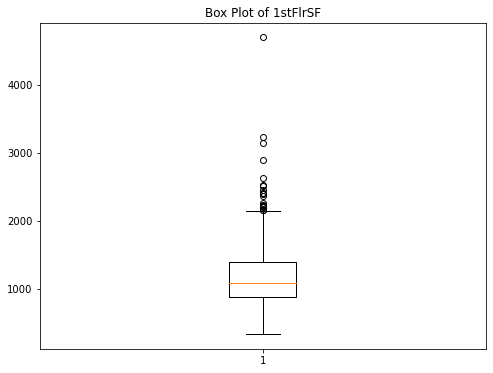

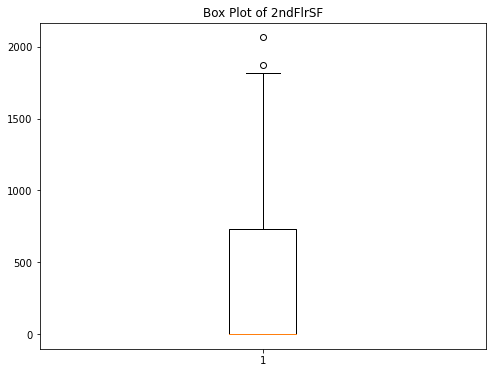

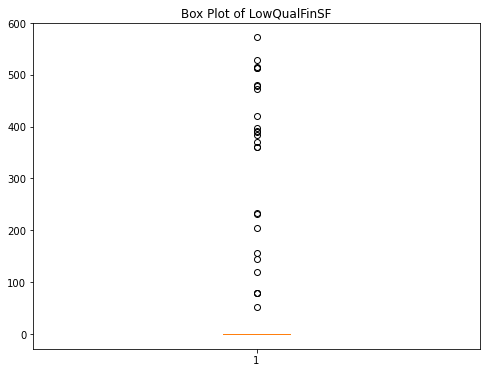

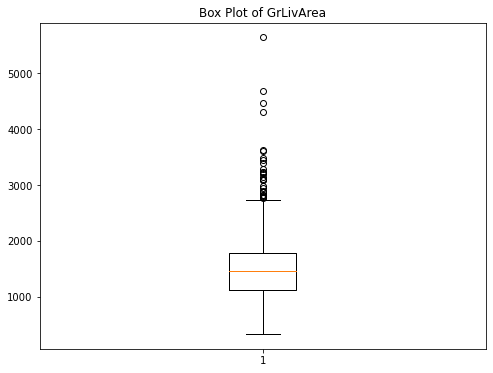

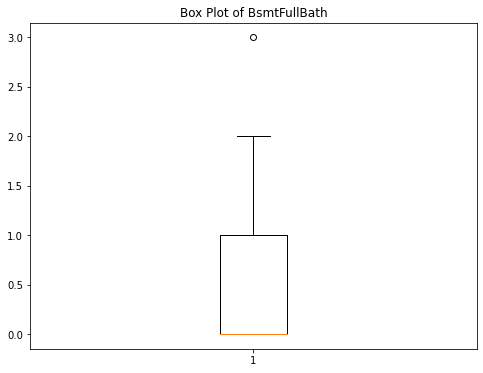

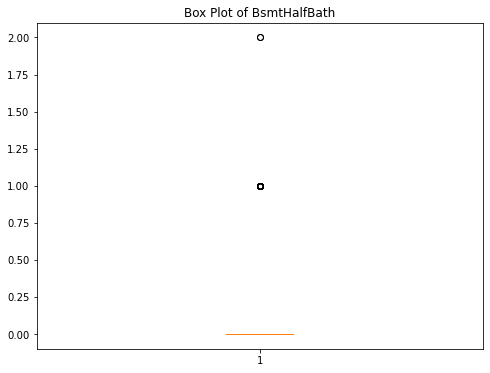

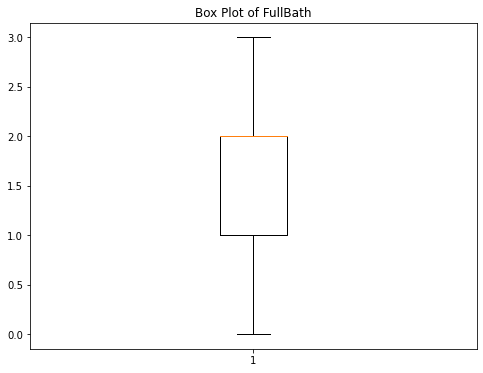

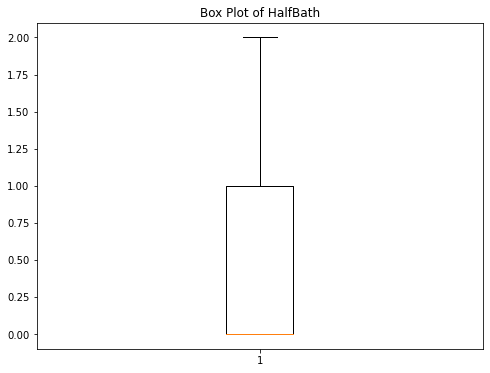

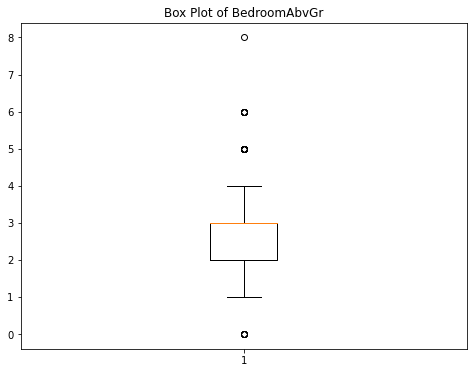

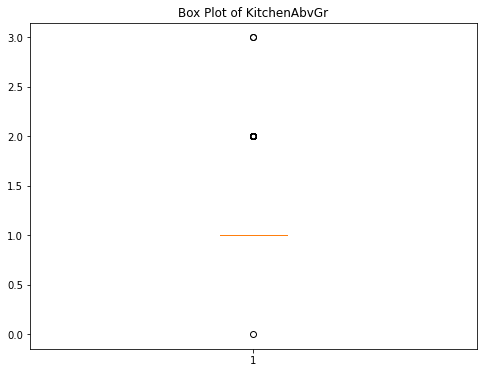

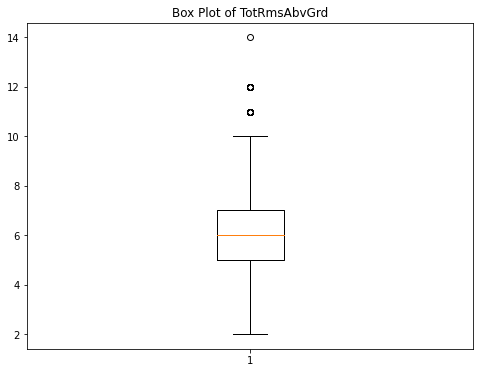

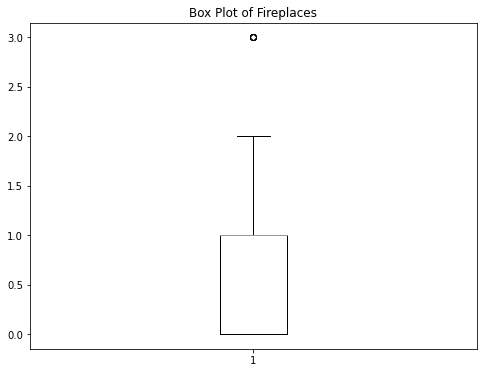

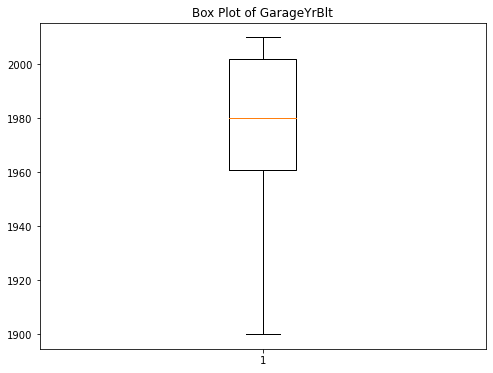

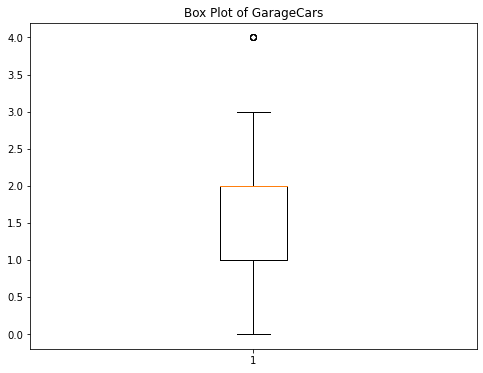

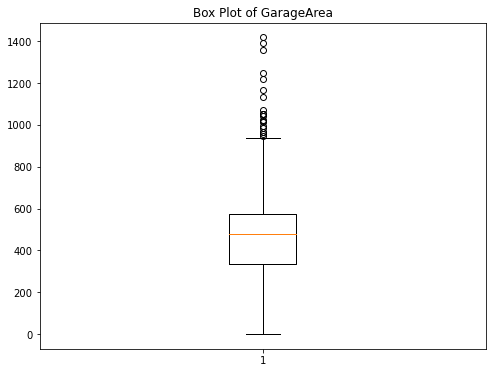

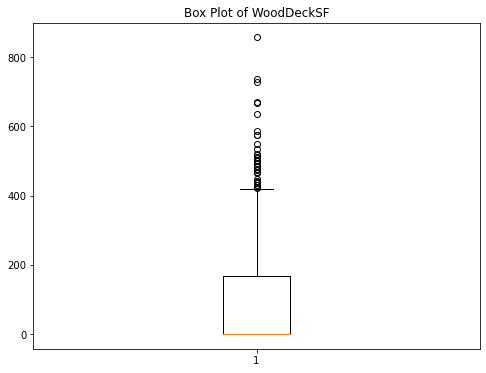

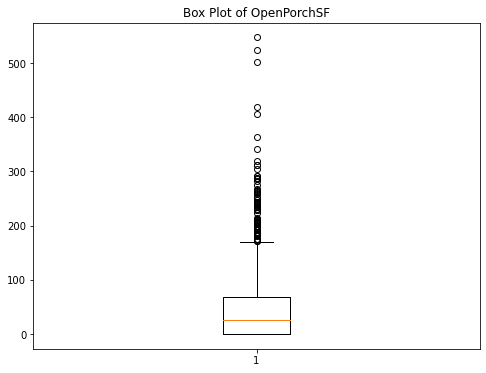

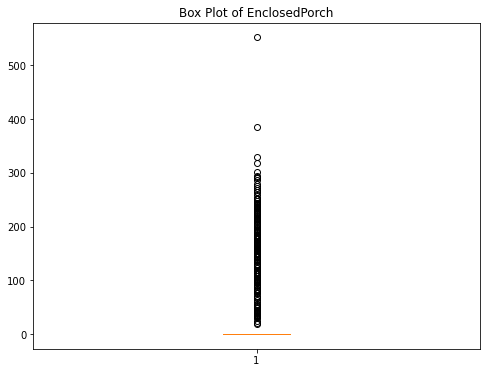

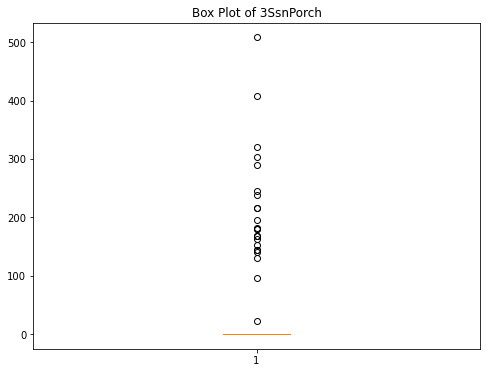

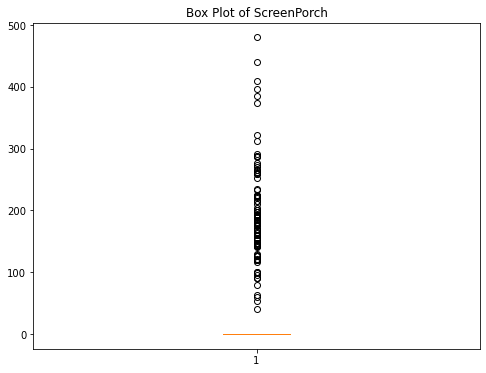

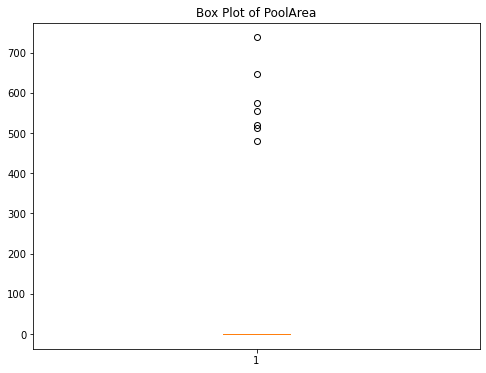

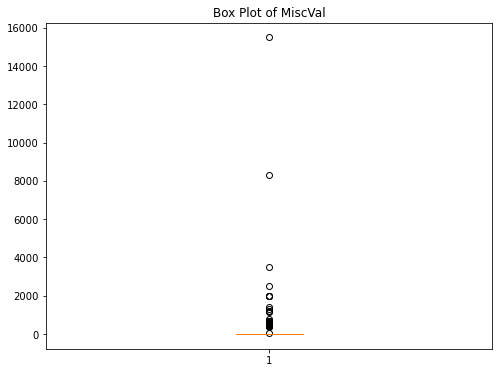

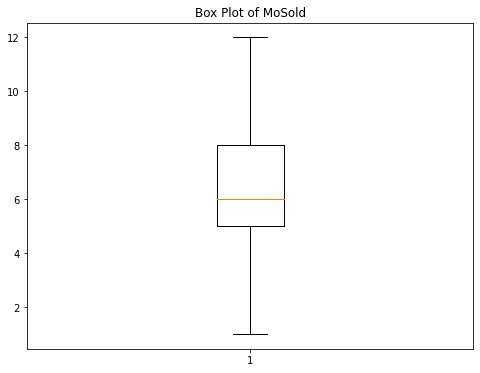

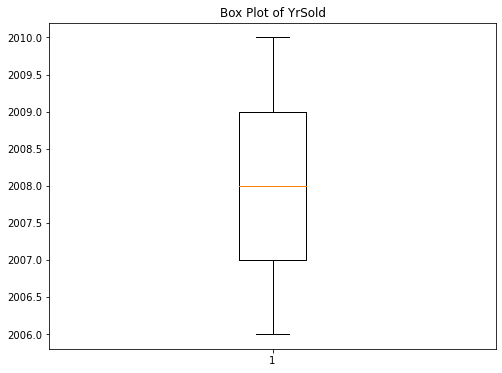

In [8]:
# Box Plot
for feature in numeric_features:
    plt.figure(figsize=(8,6))
    plt.boxplot(X_train[feature].dropna())
    plt.title(f'Box Plot of {feature}')
    plt.show()

- - Check the correlations between your variables and the target variable

In [9]:
#Correlations between numerical features and the target column
correlations=train_df.corr()
sale_price_corr=correlations['SalePrice'].sort_values(ascending=False)
print(sale_price_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


- Split your data into train and test (Keep in mind that this test data will only be used for training purposes. you are going to report your test result on the `test.csv` file, not on this test data that you obtained from the training data)

In [10]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

- Train your transformers on the train data set. You may choose to use pipeline and column transformer at this step. 
- - scaler
- - polynomial transformer
- - OneHot Encoder
- - Simple Imputer

In [11]:
#categorical fetures
categorical_features=X_train.select_dtypes(include=['object']).columns

In [12]:
#preprocessing pipeline for numeric features
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2,include_bias=False))
])

In [13]:
#preprocessing pipeline for categorical features
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
#Combine preprocessing for numeric and categorical features
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [15]:
X_train_preprocessed=preprocessor.fit_transform(X_train)
X_valid_preprocessed=preprocessor.transform(X_valid)

- Train Linear regression. Ridge Regression, and Lasso Regression models

In [16]:
# Initialize the models
lin_reg=LinearRegression()
ridge_reg=Ridge(alpha=0.1)
lasso_reg=Lasso(alpha=0.1)

In [17]:
# Fit the models on preprocesed training data
lin_reg.fit(X_train_preprocessed,y_train)
ridge_reg.fit(X_train_preprocessed,y_train)
lasso_reg.fit(X_train_preprocessed,y_train)

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.879e+10, tolerance: 6.648e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

In [18]:
#Predict on the validation dataset
y_pred_lin=lin_reg.predict(X_valid_preprocessed)
y_pred_ridge=ridge_reg.predict(X_valid_preprocessed)
y_pred_lasso=lasso_reg.predict(X_valid_preprocessed)

In [19]:
# Report MSE for each model
print("Linear Regression MSE:", mean_squared_error(y_valid, y_pred_lin))
print("Ridge Regression MSE:", mean_squared_error(y_valid, y_pred_ridge))
print("Lasso Regression MSE:", mean_squared_error(y_valid, y_pred_lasso))

Linear Regression MSE: 3.9043696287677063e+31
Ridge Regression MSE: 8984382258.85562
Lasso Regression MSE: 3314218773.235777


- Optimize the `alpha` parameter for Ridge and Lasso Regressors

In [20]:
param_grid={'alpha':[0.01,0.1,1,10,100]}

# ridge optimizatioin
ridge_search=GridSearchCV(Ridge(),param_grid,cv=5)
ridge_search.fit(X_train_preprocessed,y_train)
print("Best Ridge alpha:", ridge_search.best_params_)
      
# lasso optimizatioin
lasso_search=GridSearchCV(Lasso(),param_grid,cv=5)
lasso_search.fit(X_train_preprocessed,y_train)
print("Best Lasso alpha:", lasso_search.best_params_)
      

Best Ridge alpha: {'alpha': 10}


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+10, tolerance: 4.973e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.777e+10, tolerance: 5.586e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of t

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+10, tolerance: 5.473e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.047e+10, tolerance: 5.521e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Best Lasso alpha: {'alpha': 100}


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.901e+10, tolerance: 6.648e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


- Visualize the coefficients of the three models as we did in class

In [21]:
lin_coefs=lin_reg.coef_
ridge_coefs=ridge_search.best_estimator_.coef_
lasso_coefs=lasso_search.best_estimator_.coef_

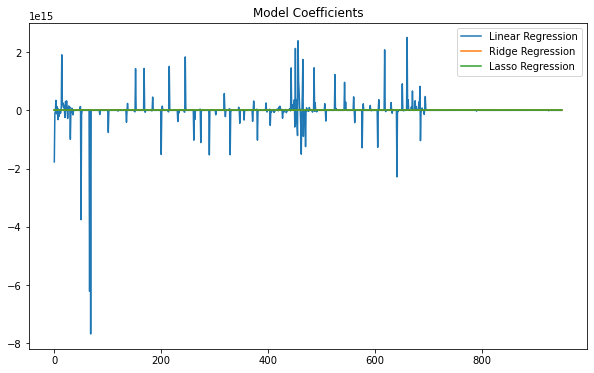

In [22]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(lin_coefs)),lin_coefs,label='Linear Regression')
plt.plot(np.arange(len(ridge_coefs)),ridge_coefs,label='Ridge Regression')
plt.plot(np.arange(len(lasso_coefs)),lasso_coefs,label='Lasso Regression')
plt.legend()
plt.title("Model Coefficients")
plt.show()

- Check which variables are eliminated with Lasso regression. Check the correlation values for these eliminated variables (you got the correlation values from an earlier step)

In [23]:
#identify variables eliminated by Lasso (coefficients close to 0)
eliminated_vars_idx=np.where(np.abs(lasso_coefs)<1e-4)[0]
#eliminated_vars_idx = [i for i, coef in enumerate(lasso_coefs) if coef == 0]
print("Variables eliminated by Lasso:", eliminated_vars_idx)

Variables eliminated by Lasso: [  0   9  10  12  14  17  20  21  31  32  33  37  38  39  40  41  42  45
  46  47  48  51  52  53  54  55  57  62  68  69  73  76  80  81  84  85
  91  92  93  95  97  99 100 101 103 104 108 109 110 111 113 115 116 118
 119 122 124 125 126 128 130 134 136 137 143 144 147 148 151 152 156 159
 160 161 162 163 164 168 169 170 171 172 180 181 182 184 185 189 190 196
 199 200 202 206 207 208 210 211 212 214 215 216 217 218 220 221 223 227
 229 232 233 234 241 242 244 245 248 249 253 254 260 261 263 264 265 270
 271 273 274 275 277 278 281 288 289 290 292 293 297 298 299 301 302 303
 306 307 311 313 314 319 320 321 322 324 325 327 328 332 333 337 339 340
 345 347 348 351 353 354 355 356 357 358 360 363 364 365 367 373 374 375
 377 379 380 384 385 386 387 389 390 391 392 393 394 395 396 398 399 400
 401 402 403 404 406 407 408 409 410 411 414 416 421 422 423 426 427 428
 429 432 434 435 436 437 438 440 441 443 444 446 447 448 450 452 453 457
 458 459 461 463 464

In [24]:
# Fit the preprocessor pipeline on X_train to make sure it's ready
#preprocessor.fit(X_train)

# Get numeric feature names (after PolynomialFeatures)
numeric_feature_names = preprocessor.named_transformers_['num'].named_steps['poly'].get_feature_names_out(numeric_features)

# Get categorical feature names (after OneHotEncoder)
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine both numeric and categorical feature names
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Print combined feature names (preprocessed)
print(all_feature_names)

# Use these feature names for checking the eliminated variables by Lasso
eliminated_vars_names = [all_feature_names[i] for i in eliminated_vars_idx]
print("Variables eliminated by Lasso:", eliminated_vars_names)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSSubClass^2', 'MSSubClass LotFrontage', 'MSSubClass LotArea', 'MSSubClass OverallQual', 'MSSubClass OverallCond', 'MSSubClass YearBuilt', 'MSSubClass YearRemodAdd', 'MSSubClass MasVnrArea', 'MSSubClass BsmtFinSF1', 'MSSubClass BsmtFinSF2', 'MSSubClass BsmtUnfSF', 'MSSubClass TotalBsmtSF', 'MSSubClass 1stFlrSF', 'MSSubClass 2ndFlrSF', 'MSSubClass LowQualFinSF', 'MSSubClass GrLivArea', 'MSSubClass BsmtFullBath', 'MSSubClass BsmtHalfBath', 'MSSubClass FullBath', 'MSSubClass HalfBath', 'MSSubClas

In [25]:
correlation_matrix = train_df.corr()

# Assuming 'SalePrice' is your target variable
sale_price_corr =correlation_matrix['SalePrice']

# Check correlations for the eliminated variables
print("Correlations for variables eliminated by Lasso:")

# Loop over the eliminated feature names and get their correlation values
for feature_name in eliminated_vars_names:
    # Sometimes features might not exist in the original correlation matrix (like poly features)
    if feature_name in sale_price_corr.index:
        print(f"Correlation for {feature_name}: {sale_price_corr[feature_name]}")
    else:
        print(f"{feature_name} not found in original features (probably a derived or transformed feature).")


Correlations for variables eliminated by Lasso:
Correlation for MSSubClass: -0.08428413512659509
Correlation for BsmtFinSF2: -0.011378121450215146
Correlation for BsmtUnfSF: 0.21447910554696928
Correlation for 1stFlrSF: 0.6058521846919153
Correlation for LowQualFinSF: -0.02560613000067955
Correlation for BsmtHalfBath: -0.01684415429735895
Correlation for BedroomAbvGr: 0.16821315430073963
Correlation for KitchenAbvGr: -0.13590737084214105
Correlation for ScreenPorch: 0.11144657114291112
Correlation for PoolArea: 0.09240354949187318
Correlation for MiscVal: -0.021189579640303213
MSSubClass LotFrontage not found in original features (probably a derived or transformed feature).
MSSubClass LotArea not found in original features (probably a derived or transformed feature).
MSSubClass OverallQual not found in original features (probably a derived or transformed feature).
MSSubClass OverallCond not found in original features (probably a derived or transformed feature).
MSSubClass YearBuilt not

In [26]:
# Preprocess the test data
X_test_preprocessed = preprocessor.transform(test_df)

In [27]:
test_pred_lin=lin_reg.predict(X_test_preprocessed)
test_pred_ridge=ridge_reg.predict(X_test_preprocessed)
test_pred_lasso=lasso_reg.predict(X_test_preprocessed)

In [28]:
print(test_pred_lin)

[1.28379289e+05 1.58862147e+11 1.79025102e+05 ... 1.55261039e+05
 1.00397977e+05 2.46800602e+05]


In [29]:
print(test_pred_ridge)

[  125989.51648622 -2109051.01736199   179733.31204674 ...
   172890.5989471    111239.73194912   245211.17318603]


In [30]:
print(test_pred_lasso)

[  120511.68239766 -1303896.63639361   173929.9358459  ...
   151285.60778139   131110.7118993    248906.76807992]
